In [1]:
!pip install tensorflow

In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv("ttrain1.csv")
df2=pd.read_csv("ttest1.csv")

In [4]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [5]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.25,NaN,S


In [6]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0,NaN,S


In [7]:
df=df1.append(df2)

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_3839/2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [8]:
# DRY- 

In [9]:
df.shape

(1309, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df.shape

(1309, 12)

In [13]:
df['Fare'].mean()

33.2954792813456

In [14]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [15]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [17]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [19]:
df['Embarked']=df['Embarked'].fillna('S')

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

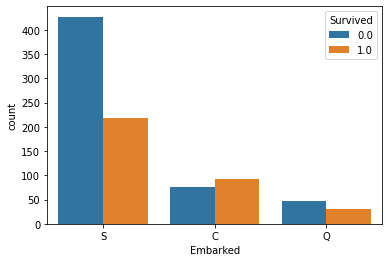

In [22]:
sns.countplot(x='Embarked',hue="Survived",data=df)

In [23]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
254,1146,NaN,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S
718,719,0.0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
436,437,0.0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
251,252,0.0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
616,617,0.0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S


In [24]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [25]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [26]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [27]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Col','Major','Dr','Capt'],'Mr')

In [28]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [29]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [30]:
1014/1309

0.774637127578304

In [31]:
del df['Cabin']

In [32]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

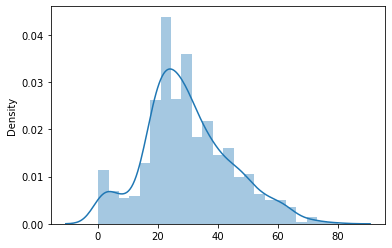

In [33]:
sns.distplot(x=df.Age)

In [34]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [35]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [36]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform("median"))

In [37]:
df['Family']=df['SibSp']+df['Parch'] +1

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

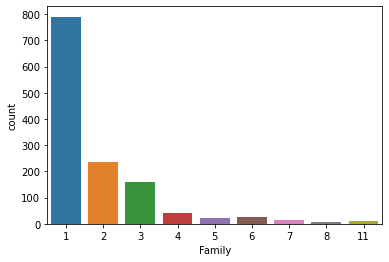

In [38]:
sns.countplot(df['Family'])

In [39]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [40]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [41]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
345,1.0,2,female,24.0,0,0,13.0,S,Miss,1


In [42]:
data=pd.get_dummies(df,drop_first=True)

In [43]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [44]:
train=data[:891]
test=data[891:]

In [45]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [46]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,1,1,0,1,0,1,0
887,1.0,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,0.0,3,22.0,1,2,23.4500,4,0,0,1,1,0,0
889,1.0,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [47]:
y=train['Survived']

In [48]:
x=train.drop('Survived',axis=1)

In [49]:
test=test.drop('Survived',axis=1)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [54]:
g.fit(x,y)

GaussianNB()

In [56]:
b.fit(x,y)

BernoulliNB()

In [57]:
tahmin=g.predict(test)

In [58]:
tahmin

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [59]:
df.shape

(1309, 10)

In [60]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
df1.shape

(891, 12)

In [62]:
df2.shape

(418, 11)

In [63]:
sonuc=df2[['PassengerId']]

In [64]:
sonuc['Survived']=tahmin

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_3839/2725349856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=tahmin


In [65]:
sonuc.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
g=GradientBoostingClassifier()

In [67]:
g.fit(x,y)

GradientBoostingClassifier()

In [68]:
tahmin3=g.predict(x)

In [69]:
accuracy_score(tahmin3,y)

0.8978675645342312

In [99]:
b.fit(x,y)

BernoulliNB()

In [100]:
tahmin=b.predict(x)

In [101]:
accuracy_score(tahmin,y)

0.7856341189674523

### Şimdi titanic verisini Deep Learning Keras kullanarak analiz edelim

In [97]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax'),])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x,y, batch_size=32, epochs=100, verbose=1, validation_data=(x_test,y_test))

Epoch 1/100
28/28 [==============================] - 1s 15ms/step - loss: 1.2323 - accuracy: 0.5735 - val_loss: 0.6624 - val_accuracy: 0.7263
Epoch 2/100
28/28 [==============================] - 0s 8ms/step - loss: 0.7675 - accuracy: 0.6420 - val_loss: 0.6248 - val_accuracy: 0.7039
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 0.7494 - accuracy: 0.6532 - val_loss: 0.5367 - val_accuracy: 0.7430
Epoch 4/100
28/28 [==============================] - 0s 8ms/step - loss: 0.6449 - accuracy: 0.6914 - val_loss: 0.5650 - val_accuracy: 0.7374
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 0.5913 - accuracy: 0.7138 - val_loss: 0.5421 - val_accuracy: 0.6872
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.7127 - val_loss: 0.4768 - val_accuracy: 0.7430
Epoch 7/100
28/28 [==============================] - 0s 8ms/step - loss: 0.5711 - accuracy: 0.7239 - val_loss: 0.4772 - val_accuracy: 0.8045
Epoch 8/100


28/28 [==============================] - 0s 8ms/step - loss: 0.3911 - accuracy: 0.8328 - val_loss: 0.3938 - val_accuracy: 0.8156
Epoch 59/100
28/28 [==============================] - 0s 8ms/step - loss: 0.3949 - accuracy: 0.8294 - val_loss: 0.3494 - val_accuracy: 0.8156
Epoch 60/100
28/28 [==============================] - 0s 8ms/step - loss: 0.3955 - accuracy: 0.8272 - val_loss: 0.3680 - val_accuracy: 0.8101
Epoch 61/100
28/28 [==============================] - 0s 8ms/step - loss: 0.3956 - accuracy: 0.8395 - val_loss: 0.3519 - val_accuracy: 0.8212
Epoch 62/100
28/28 [==============================] - 0s 8ms/step - loss: 0.3892 - accuracy: 0.8373 - val_loss: 0.3825 - val_accuracy: 0.8101
Epoch 63/100
28/28 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.8406 - val_loss: 0.3487 - val_accuracy: 0.8492
Epoch 64/100
28/28 [==============================] - 0s 8ms/step - loss: 0.3810 - accuracy: 0.8451 - val_loss: 0.3851 - val_accuracy: 0.7989
Epoch 65/100
28/28 

In [98]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %2f' % (accuracy*100))

6/6 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.8492
Accuracy: 84.916198


In [102]:
#Deep Learning başarı oranı 84.91 
#Gradient Boost baarı oranı 89
#BernoulliNB başarı oranı 78